## Introduction

In this project, I will go through the whole process of building a machine learning model using the famous Titanic dataset, which is extensively utilized by data scientists to predict survival outcomes based on various features like age, sex, class, and more. This project aims to provide insights into the factors that influenced survival rates during this tragic event and to develop predictive models that could offer lessons for safety and risk management in current transportation systems.

## Data Description

The Titanic dataset comprises demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. This dataset has been divided into two sets: a training set and a test set. The training set is used to build and train the machine learning models, while the test set is used to evaluate their performance. Key variables in this dataset include passenger class (Pclass), name, sex, age, siblings/spouses aboard (SibSp), parents/children aboard (Parch), ticket number, fare, cabin number, and port of embarkation. These variables are critical in analyzing and predicting the factors that influenced survival rates during the Titanic disaster.

## Methodology
**Data Preparation:** Data was cleaned and preprocessed to handle missing values, encode categorical variables, and create new features that could potentially improve the predictive model's accuracy.

**Exploratory Data Analysis:** Performed statistical analysis and visual data exploration to understand the distribution of key variables and the relationship between different features and survival rates.

**Model Development:**

1. Built multiple machine learning models including Logistic Regression, K-Nearest Neighbors, Decision Trees, Random Forest, Naive Bayes, and Stochastic Gradient Descent to predict survival.
2. Employed cross-validation techniques to ensure the robustness and generalizability of the models.
3. Tuned models using grid search to find the optimal parameters.

**Evaluation:**
1. Evaluated models based on their accuracy, precision, recall, F1-score, and ROC-AUC scores.
2. Analyzed feature importance, particularly from tree-based models, to understand what factors most significantly predicted survival.

## Outcomes

The Random Forest and Decision Tree models performed exceptionally well with an accuracy score of approximately 92.26%. Logistic Regression, KNN, Naive Bayes, and Stochastic Gradient Descent also showed varying levels of predictive power. The evaluation further revealed insights through the precision-recall trade-off and ROC curve analysis, where the area under the curve (AUC) for the best model approached 0.9405, indicating a high level of predictive accuracy

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
df_train = pd.read_csv("/Users/ayu/Desktop/titanic/train.csv")
df_test = pd.read_csv("/Users/ayu/Desktop/titanic/test.csv")

In [3]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the training set, we can see that 38% of the passengers survived the Titanic disaster. The ages of the passengers vary widely, ranging from just a few months old (0.4 years) to 80 years. Additionally, we’ve identified some gaps in the dataset, particularly in the 'Age' feature, where some data points are missing.

## Examining Missing Data Details

In [6]:
missing_values_count = df_train.isnull().sum()
missing_values_percentage = (df_train.isnull().sum() / len(df_train)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage': missing_values_percentage
})

print(missing_summary.sort_values(by='Percentage', ascending=False))

             Missing Values  Percentage
Cabin                   687   77.104377
Age                     177   19.865320
Embarked                  2    0.224467
PassengerId               0    0.000000
Survived                  0    0.000000
Pclass                    0    0.000000
Name                      0    0.000000
Sex                       0    0.000000
SibSp                     0    0.000000
Parch                     0    0.000000
Ticket                    0    0.000000
Fare                      0    0.000000


The 'Embarked' feature is missing only 2 values, we can fill easily. The 'Age' feature, with 177 missing values, will be more difficult to handle. The 'Cabin' feature is also problematic, as 77% of its data is missing,will remove it futher.

**Age and Sex:**

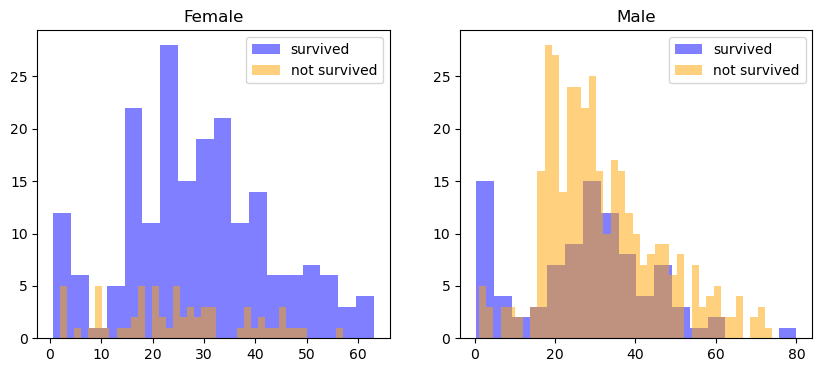

In [7]:
# Define labels
survived = 'survived'
not_survived = 'not survived'

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sexes = ['female', 'male']
colors = ['blue', 'orange']  # Define colors for survived and not survived

for i, sex in enumerate(sexes):
    # Plotting directly without creating subsets
    axes[i].hist(df_train[(df_train['Sex'] == sex) & (df_train['Survived'] == 1)]['Age'].dropna(), 
                 bins=18, alpha=0.5, label=survived, color=colors[0])
    axes[i].hist(df_train[(df_train['Sex'] == sex) & (df_train['Survived'] == 0)]['Age'].dropna(), 
                 bins=40, alpha=0.5, label=not_survived, color=colors[1])

    # Set titles and legend
    axes[i].set_title(sex.capitalize())
    axes[i].legend()

# Show plot
plt.show()


**Men's Survival Rates:** Men aged 18 to 30 have a notably higher chance of survival, whereas boys between the ages of 5 and 18 have much lower survival rates.

**Women's Survival Trends:** Women show higher survival probabilities between the ages of 14 and 40, which is slightly broader compared to the age range for men.

**Infants' Survival:** Infants across genders have a slightly higher chance of survival, possibly due to prioritization during rescue operations.

**Future Analysis Strategy:** Observing distinct survival patterns across different age groups, I plan to segment the data into age groups for a more refined analysis, ensuring each feature is consistently scaled.


**Embarked, Pclass and Sex:**

/Users/ayu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


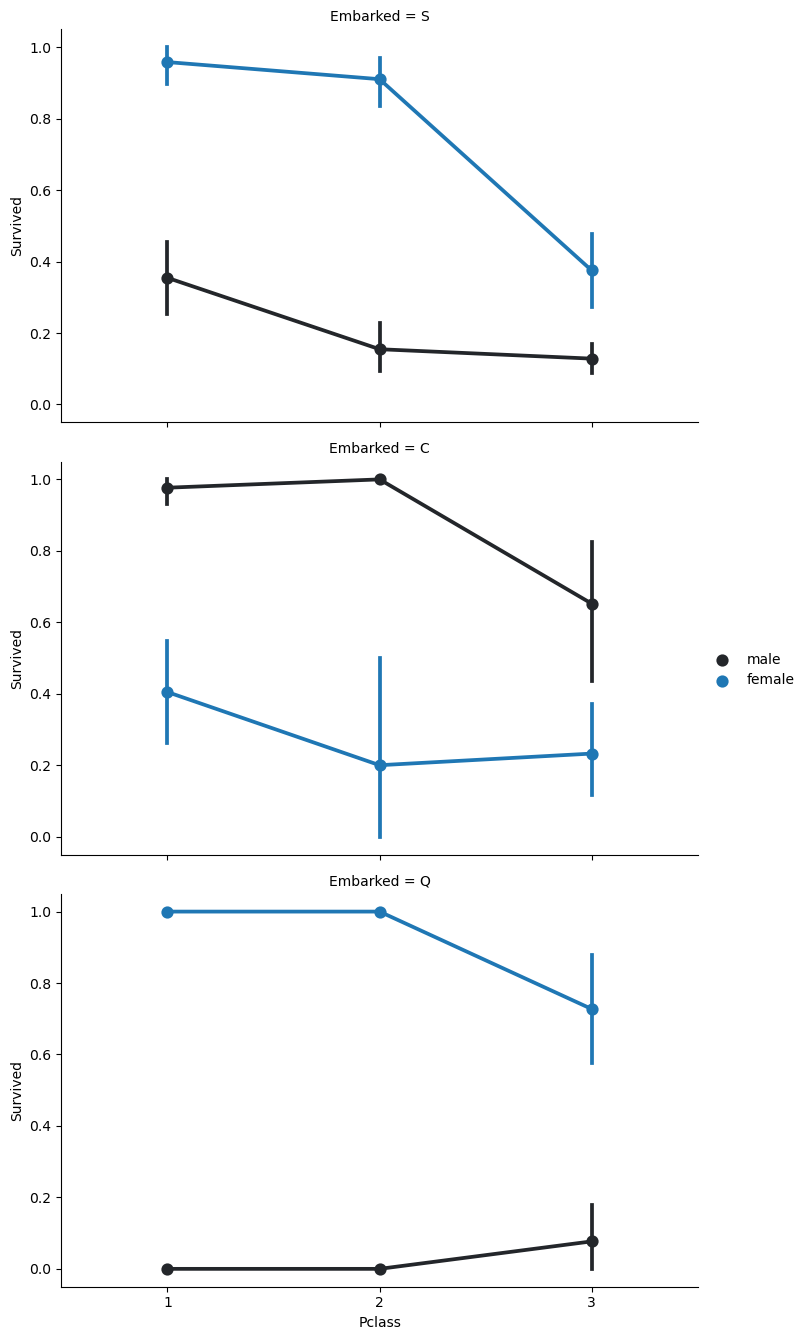

In [8]:
FacetGrid = sns.FacetGrid(df_train, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()


 **Pclass:**

<Axes: xlabel='Pclass', ylabel='Survived'>

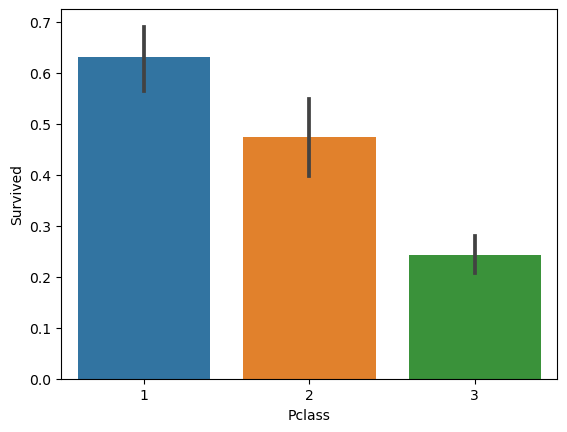

In [9]:
sns.barplot(x='Pclass', y='Survived', data=df_train)

/Users/ayu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


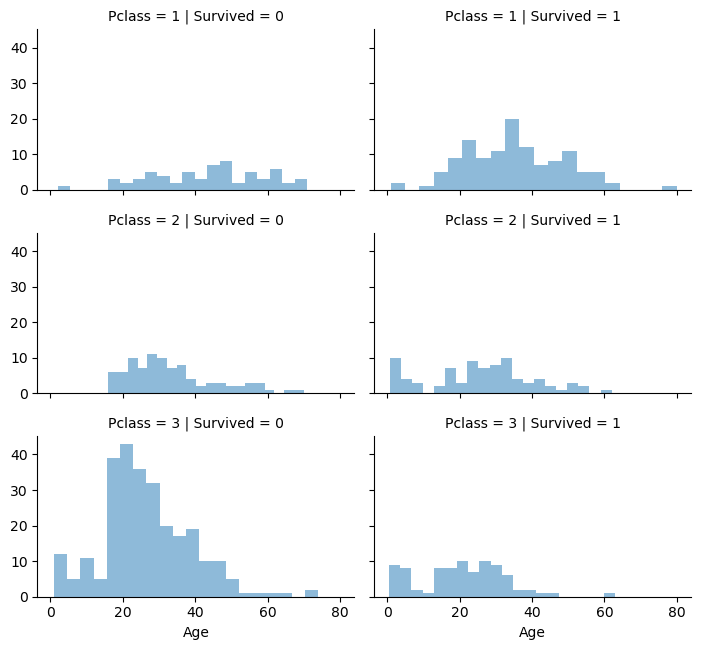

In [10]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

The plot above shows that people in first class had a higher chance of survival, as we expected. It also shows that people in third class had a much lower chance of surviving

###  SibSp and Parch:

The features 'SibSp' (siblings and spouses) and 'Parch' (parents and children) are more useful when combined to show the total number of family members a person has on the Titanic. I'll create a new feature that sums these up, and another feature to indicate if someone is traveling alone.

In [11]:
data = [df_train,df_test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [12]:
df_train['not_alone'].value_counts()

not_alone
1    537
0    354
Name: count, dtype: int64

/Users/ayu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


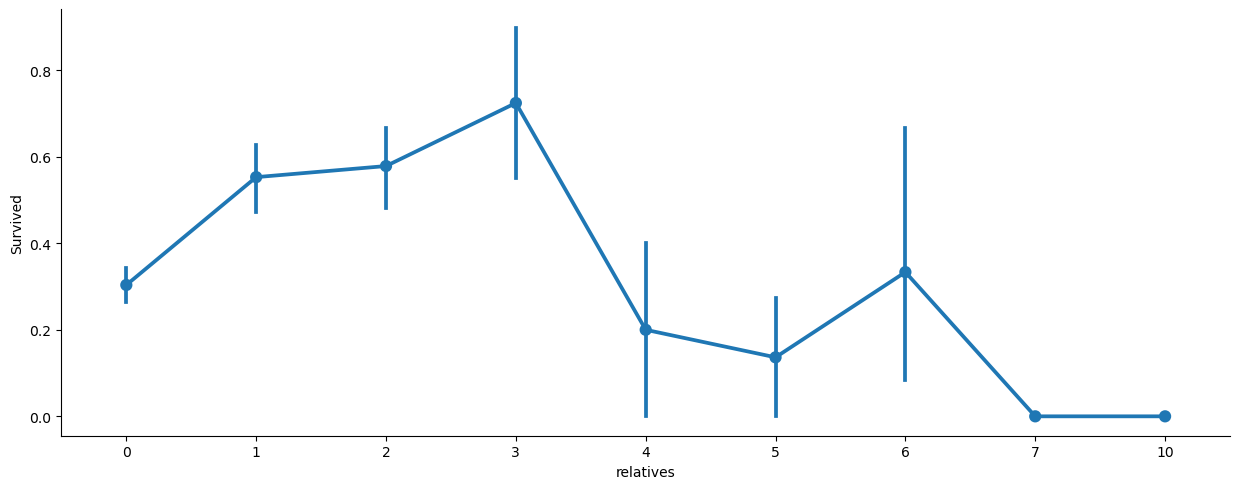

In [13]:
axes = sns.catplot(x='relatives', y='Survived', data=df_train, kind='point', aspect=2.5)


### Data Preprocessing

First, I will drop 'PassengerId' from the train set, because it does not contribute to a persons survival probability. I will not drop it from the test set

# Missing Data:
## Cabin:
We need to address missing values in the 'Cabin' (687 missing), 'Embarked' (2 missing), and 'Age' (177 missing) features. We'll extract the deck information from 'Cabin' to create a new feature, then turn it into a numeric variable. Any missing values will be filled with zero

In [14]:
df_train = df_train.drop(['PassengerId'], axis=1)

In [15]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [df_train, df_test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 

In [16]:
# we can now drop the cabin feature
df_train = df_train.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

In [17]:
for dataset in [df_train, df_test]:
    # Calculate the median age from both datasets combined to maintain consistency
    median_age = pd.concat([df_train['Age'], df_test['Age']]).median()
    # Fill NaN values in the Age column with the median age
    dataset['Age'].fillna(median_age, inplace=True)
    # Convert ages to integer
    dataset['Age'] = dataset['Age'].astype(int)


In [18]:
df_train["Age"].isnull().sum()

0

In [19]:
df_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [20]:
common_value = 'S'
data = [df_train, df_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int64  
 12  Deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


In [22]:
data = [df_train, df_test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [23]:
data = [df_train, df_test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

In [24]:
df_train = df_train.drop(['Name'], axis=1)
df_test = df_test.drop(['Name'], axis=1)

Convert 'Sex' feature into numeric

In [25]:
genders = {"male": 0, "female": 1}
data = [df_train, df_test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [26]:
df_train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Since there are 681 unique tickets in the 'Ticket' attribute, converting them into useful categories is challenging. Therefore, we will remove this attribute from the dataset.

In [27]:
df_train = df_train.drop(['Ticket'], axis=1)
df_test = df_test.drop(['Ticket'], axis=1)

Embarked:
Convert 'Embarked' feature into numeric

In [28]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [df_train, df_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

**Creating Categories:**
We will now create categories within the following features:

**Age:**
First, we'll convert the 'Age' feature from a float to an integer. Then, we'll create a new variable called 'AgeGroup' by categorizing each age into different groups. It's important to carefully decide how to form these groups to avoid having too much of the data, like 80%, fall into just one group.

In [29]:
data = [df_train, df_test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [30]:
# let's see how it's distributed
df_train['Age'].value_counts() 

Age
4    303
6    148
3    106
5    103
2     92
1     71
0     68
Name: count, dtype: int64

**Fare:**
For the 'Fare' feature, we need to categorize it similarly to how we handled the 'Age' feature. However, it's more challenging because dividing the fare values into a few equal categories would result in 80% of the values falling into the first category. To address this, we can use the "qcut()" function from sklearn, which helps us determine how to effectively create these categories

In [31]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
5,0,3,0,4,0,0,8,2,0,1,8,1
6,0,1,0,6,0,0,51,0,0,1,5,1
7,0,3,0,0,3,1,21,0,4,0,8,4
8,1,3,1,3,0,2,11,0,2,0,8,3
9,1,2,1,1,1,0,30,1,1,0,8,3


In [32]:
data = [df_train , df_test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

# Building Machine Learning Models

In [33]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()

In [34]:
print(X_train.columns)
print(X_test.columns)


Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'relatives', 'not_alone', 'Deck', 'Title'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'relatives', 'not_alone', 'Deck', 'Title'],
      dtype='object')


In [35]:
# Initialize and fit the SGD Classifier
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)

# Predict on the test data (if needed)
Y_pred = sgd.predict(X_test)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


print(round(acc_sgd,2,), "%")


74.19 %


In [36]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.26 %


In [37]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")

81.82 %


In [38]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")

86.98 %


In [39]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

92.26 %


In [40]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

78.68 %


# Which is the best Model ?

In [41]:
results = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [ acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.26,Random Forest
92.26,Decision Tree
86.98,KNN
81.82,Logistic Regression
78.68,Naive Bayes
74.19,Stochastic Gradient Decent


As we can see, The Random Forest and Decision Tree models scored the highest at 92.26%. However, to confirm the reliability of these results, we should perform **cross-validation**, which will help verify the models' effectiveness across different subsets of the dataset. This approach ensures that the high scores are consistent and not just a result of the particular way the data was split.

We use K-Fold Cross Validation on the Titanic dataset to ensure our model's predictions are reliable and not just lucky guesses based on one way of splitting the data. This method divides the data into 'K' number of subsets and tests the model on each one, helping to average out the accuracy and reduce bias.

In [42]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

In [43]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77777778 0.85393258 0.76404494 0.84269663 0.86516854 0.86516854
 0.80898876 0.76404494 0.83146067 0.85393258]
Mean: 0.8227215980024969
Standard Deviation: 0.038886434014733816


After using K-Fold Cross Validation, the model has shown more realistic results. It achieved an average accuracy of 82% with a standard deviation of 4%. This variation indicates that our model's accuracy can vary by approximately +/- 4% across different data splits. The standard deviation is a measure of how much variation or dispersion there is from the average, suggesting our model's accuracy estimates are quite precise. Despite this variability, the accuracy is still considered good, and we plan to explore ways to further improve the performance of our Random Forest model in the next steps of our analysis.

**Random Forest** models help us understand the significance of each input by observing how much using a specific feature decreases uncertainty in predictions across all trees in the forest. After training, the algorithm assigns a score to each feature, indicating its effectiveness in improving the model’s accuracy. These scores are adjusted so that their total equals one, allowing us to easily see which features contribute most to the model's predictions. We'll look into these scores next.

In [44]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [45]:
importances.head(15)

,importance
feature,
Title,0.217
Sex,0.179
Age,0.135
Pclass,0.095
Fare,0.093
Deck,0.092
relatives,0.064
Embarked,0.049
SibSp,0.038


<Axes: xlabel='feature'>

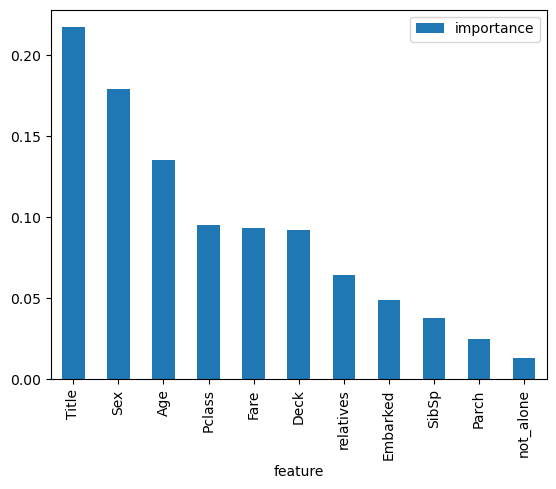

In [46]:
importances.plot.bar()

**The graph shows that 'Title', 'Sex', and 'Age' are the most critical factors influencing survival on the Titanic, indicating the importance of social status, gender, and age. In contrast, features like 'not_alone' and 'Parch' are the least impactful,so will remove from the dataset.**

In [47]:
df_train  = df_train.drop("not_alone", axis=1)
df_test  = df_test.drop("not_alone", axis=1)

df_train  = df_train.drop("Parch", axis=1)
df_test  = df_test.drop("Parch", axis=1)

**Training random forest again**

In [48]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.26 %


Our random forest model predicts as good as it did before. 

There is also another way to evaluate a random-forest classifier, which is probably much more accurate than the score we used before.The out-of-bag estimate provides a highly accurate method to assess a random forest's accuracy, comparable to having a separate test set the same size as the training set. This method eliminates the need for a dedicated test set.

**Test new paramters:**

In [50]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='sqrt', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.83 %


## Confusion Matrix:

In [51]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[490,  59],
       [ 94, 248]])

The confusion matrix shows that the model correctly predicted 490 true negatives (people who did not survive and were correctly identified) and 248 true positives (people who survived and were correctly identified). However, there were 59 false positives (people incorrectly identified as survivors) and 94 false negatives (people who did not survive but were incorrectly identified as survivors). Anyways a confusion matrix gives you a lot of information about how well your model does, but theres a way to get even more, like computing the classifiers precision.

**Precision and Recall:**

In [52]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8078175895765473
Recall: 0.7251461988304093


The model has a precision of 80.87%, meaning it correctly predicts survival 80.87% of the time when it predicts a passenger survived. The recall is 72.51%, indicating it successfully identifies 72.51% of all actual survivors.

The **F-score**  is a single metric that blends both precision and recall, calculated using their harmonic mean. This method emphasizes the lower of the two values, meaning that a high F-score is only achieved if both precision and recall are strong. We use the F-score here to assess the balance between precision and recall, ensuring that our model effectively captures true positives without a high number of false positives or false negatives

In [53]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7642526964560863

We achieved a 77% F-score, which isn't very high due to our recall of 73%. The F-score tends to prefer classifiers where precision and recall are balanced, which can be limiting. Sometimes, you might prefer either high precision or high recall, but improving one can often lower the other, a situation known as the precision/recall tradeoff. We'll explore this tradeoff

**Precision Recall Curve**

The Random Forest algorithm assigns a probability to each individual's survival, classifying them as survived if their score exceeds a certain threshold, and as not survived if it does not. The threshold value is crucial in this process. We will use matplotlib to plot how precision and recall change with different threshold settings

In [54]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)

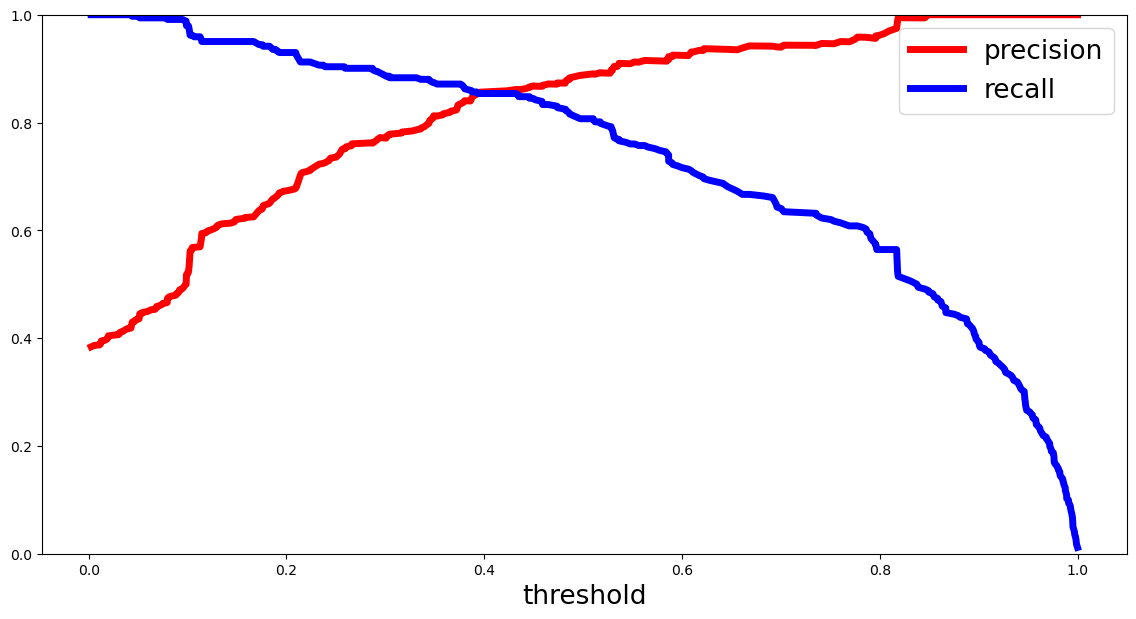

In [55]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

From the graph, it's clear that recall drops sharply when precision reaches about **85%**. Therefore, it might be better to choose a trade-off earlier, around **75% precision**. This allows you to select a threshold, like ***0.4***, which achieves a precision of **80%**. By setting the model to this threshold, you can attain the accuracy you need. Another approach is to directly compare precision and recall by plotting them against each other.

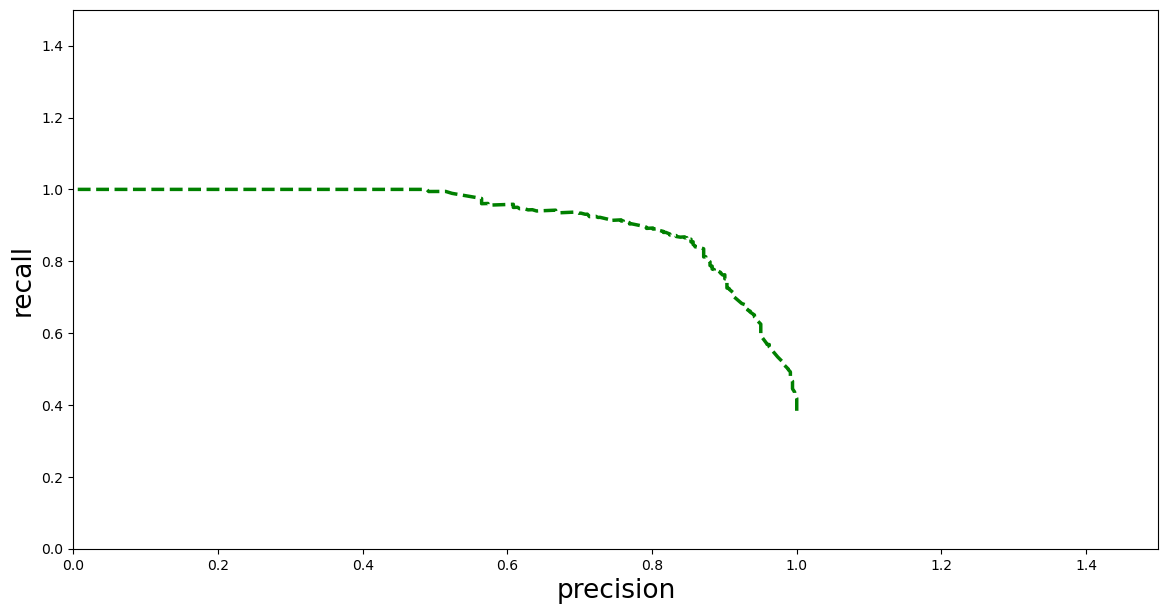

In [56]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

**ROC AUC Curve**

The ROC AUC Curve is another method to assess and compare your binary classifier. It plots the true positive rate (recall) against the false positive rate (the proportion of negative instances incorrectly classified as positive), offering a different perspective from plotting precision against recall.

In [57]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

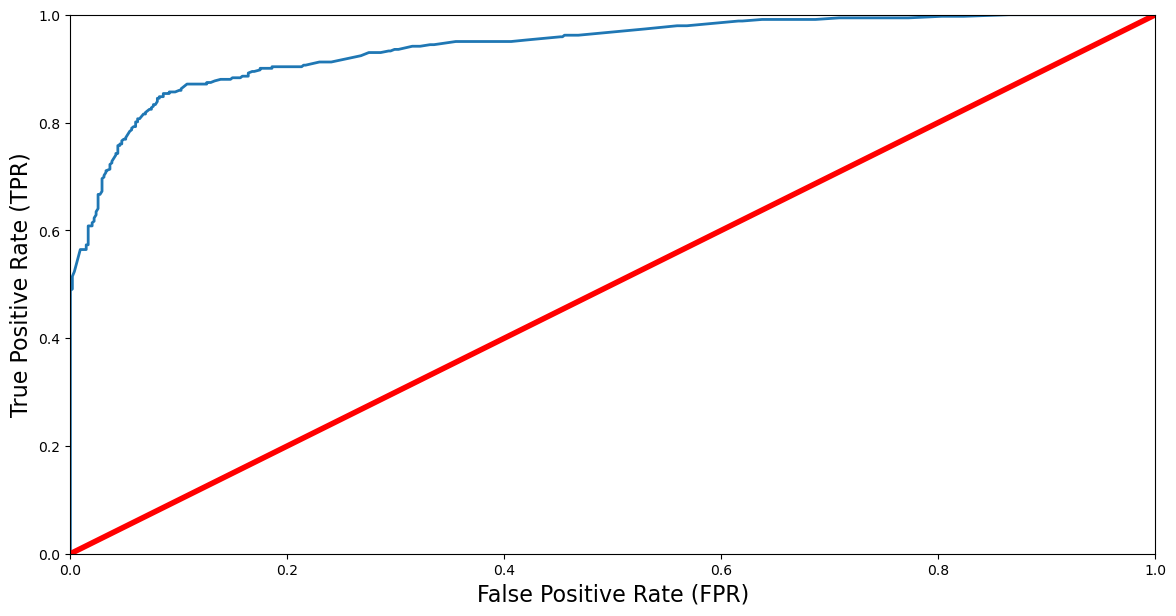

In [58]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

**The red line in the middle represents a random classifier, like a coin flip, and an effective classifier should perform much better than this line. Our Random Forest model performs well. However, there's a tradeoff: as the true positive rate increases, so does the number of false positives**

**ROC AUC Score**

The ROC AUC Score quantifies the performance of a classifier by measuring the area under the ROC AUC Curve (AUC). A perfect classifier achieves a score of 1, while a completely random classifier scores 0.5.

In [60]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9404099958457162


The **ROC AUC score of 0.9404**, it indicates that the Random Forest model is performing very well in distinguishing between the passengers who survived and those who did not on the Titanic. This high score, close to 1, suggests the model is highly effective, with a strong true positive rate and a manageable false positive rate

## Conclusion : 

The analysis using the Titanic dataset with the Random Forest model has proven to be highly effective, as evidenced by a ROC AUC score of **0.9404**, which is significantly better than a random guess. This model efficiently utilizes passenger data such as sex, age, and ticket class to predict survival outcomes. Such insights could be invaluable for improving safety protocols and understanding demographic impacts on survival in disaster scenarios.